In [26]:

import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import random

In [18]:
logs = get_all_logs('test_experiment')
logs

,config_id,algorithm,dataset,seed,generation,elite_train_error,time,population_nodes,elite_test_error,elite_nodes,log_level
0,1,StandardGP,blood,1,1,0.493828,0.000000,12.0,0.515428,3,1
1,1,StandardGP,blood,1,2,0.493828,0.000000,14.0,0.515428,3,1
2,1,StandardGP,blood,1,3,0.493828,0.015793,12.0,0.515428,3,1
3,1,StandardGP,blood,1,4,0.493828,0.000000,12.0,0.515428,3,1
4,1,StandardGP,blood,1,5,0.493828,0.000000,14.0,0.515428,3,1
...,...,...,...,...,...,...,...,...,...,...,...
282606,48,SLIM+SIG2,spect,30,6,0.363636,0.002056,34.0,0.400000,3,1
282607,48,SLIM+SIG2,spect,30,7,0.374384,0.002008,23.0,0.365591,14,1
282608,48,SLIM+SIG2,spect,30,8,0.374384,0.002002,23.0,0.365591,14,1
282609,48,SLIM+SIG2,spect,30,9,0.374384,0.002003,34.0,0.365591,14,1


In [19]:
grp = logs.groupby(['config_id', 'dataset', 'generation', 'seed'])[['elite_train_error', 'elite_test_error', 'elite_nodes']].median()
grp

elite_train_error  elite_test_error  \
config_id dataset generation seed                                        
1         blood   0          2              0.621369          0.502913   
                             3              0.550807          0.650798   
                             4              0.500800          0.502409   
                             5              0.500000          0.500000   
                             6              0.613725          0.747287   
...                                              ...               ...   
48        spect   10         26             0.381910          0.386364   
                             27             0.397516          0.394366   
                             28             0.402116          0.365591   
                             29             0.385417          0.382022   
                             30             0.374384          0.365591   

                                   elite_nodes  
config_id dataset generation seed               
1         blood   0          2             3.0  
                             3             3.0  
                             4             3.0  
                             5             3.0  
                             6             3.0  
...                                        ...  
48        spect   10         26            3.0  
                             27           14.0  
                             28            3.0  
                             29            3.0  
                             30           14.0  

[284256 rows x 3 columns]

In [20]:
all_results = get_all_results('test_experiment')
all_results.loc[all_results['config.slim_version'].isna() == False, 'name'] = all_results['config.slim_version']
all_results['name'] = all_results['name'].str.upper()
all_results

,config_id,run_id,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,config.initializer,...,train.roc_auc,train.f1_score,train.precision,train.recall,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name
0,1,1,GP,True,4,10,True,1,6,rhh,...,0.721871,0.666667,0.500000,1.000000,0.240000,0.777453,0.387097,0.240000,1.000000,blood
1,1,2,GP,True,4,10,True,1,6,rhh,...,0.651958,0.391728,0.638889,0.282456,0.720000,0.632770,0.322581,0.384615,0.277778,blood
2,1,3,GP,True,4,10,True,1,6,rhh,...,0.199938,0.666667,0.500000,1.000000,0.240000,0.412714,0.387097,0.240000,1.000000,blood
3,1,4,GP,True,4,10,True,1,6,rhh,...,0.704955,0.666667,0.500000,1.000000,0.240000,0.659844,0.387097,0.240000,1.000000,blood
4,1,5,GP,True,4,10,True,1,6,rhh,...,0.721871,0.666667,0.500000,1.000000,0.240000,0.717782,0.387097,0.240000,1.000000,blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,48,26,SLIM+SIG2,False,4,10,True,1,6,rhh,...,0.668919,0.381910,0.236025,1.000000,0.333333,0.596507,0.386364,0.239437,1.000000,spect
25916,48,27,SLIM+SIG2,False,4,10,True,1,6,rhh,...,0.585348,0.397516,0.260163,0.842105,0.469136,0.550551,0.394366,0.259259,0.823529,spect
25917,48,28,SLIM+SIG2,False,4,10,True,1,6,rhh,...,0.717461,0.402116,0.251656,1.000000,0.271605,0.566176,0.365591,0.223684,1.000000,spect
25918,48,29,SLIM+SIG2,False,4,10,True,1,6,rhh,...,0.732575,0.385417,0.240260,0.973684,0.320988,0.783088,0.382022,0.236111,1.000000,spect


In [21]:
all_results['dataset_name']

0        blood
1        blood
2        blood
3        blood
4        blood
         ...  
25915    spect
25916    spect
25917    spect
25918    spect
25919    spect
Name: dataset_name, Length: 25920, dtype: object

In [23]:
all_logs = get_all_logs('test_experiment')
all_logs

,config_id,algorithm,dataset,seed,generation,elite_train_error,time,population_nodes,elite_test_error,elite_nodes,log_level
0,1,StandardGP,blood,1,1,0.493828,0.000000,12.0,0.515428,3,1
1,1,StandardGP,blood,1,2,0.493828,0.000000,14.0,0.515428,3,1
2,1,StandardGP,blood,1,3,0.493828,0.015793,12.0,0.515428,3,1
3,1,StandardGP,blood,1,4,0.493828,0.000000,12.0,0.515428,3,1
4,1,StandardGP,blood,1,5,0.493828,0.000000,14.0,0.515428,3,1
...,...,...,...,...,...,...,...,...,...,...,...
282606,48,SLIM+SIG2,spect,30,6,0.363636,0.002056,34.0,0.400000,3,1
282607,48,SLIM+SIG2,spect,30,7,0.374384,0.002008,23.0,0.365591,14,1
282608,48,SLIM+SIG2,spect,30,8,0.374384,0.002002,23.0,0.365591,14,1
282609,48,SLIM+SIG2,spect,30,9,0.374384,0.002003,34.0,0.365591,14,1


In [ ]:
grp = all_logs.groupby(['config_id', 'dataset', 'generation'])[['elite_train_error', 'elite_test_error', 'elite_nodes']].median().reset_index()

grp

,config_id,dataset,generation,elite_train_error,elite_test_error,elite_nodes
0,1,blood,0,0.550807,0.520919,3.0
1,1,blood,1,0.502470,0.510531,3.0
2,1,blood,2,0.500000,0.504521,3.0
3,1,blood,3,0.500000,0.501946,3.0
4,1,blood,4,0.500000,0.500750,3.0
...,...,...,...,...,...,...
9499,48,spect,6,0.419177,0.406349,3.0
9500,48,spect,7,0.419177,0.403532,3.0
9501,48,spect,8,0.419177,0.403532,3.0
9502,48,spect,9,0.419177,0.403532,3.0


<Axes: xlabel='generation', ylabel='elite_train_error'>

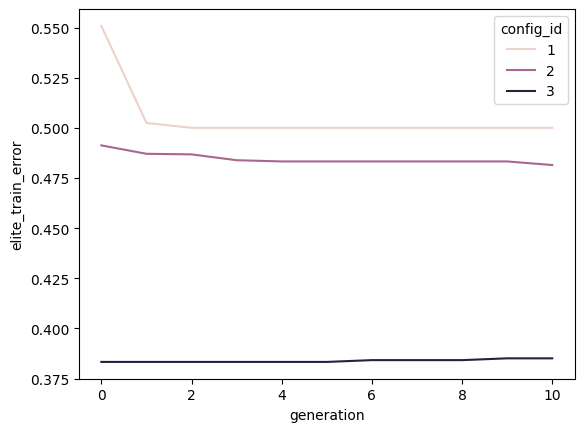

In [ ]:
sns.lineplot(data=grp.loc[(grp['dataset'] == 'blood') & (grp['config_id'] < 4)], x='generation', y='elite_train_error', hue='config_id')

In [9]:
grp['elite_train_error']

config_id  dataset  seed  generation
1          blood    1     1             0.493828
                          2             0.493828
                          3             0.493828
                          4             0.493828
                          5             0.493828
                                          ...   
48         spect    30    6             0.363636
                          7             0.374384
                          8             0.374384
                          9             0.374384
                          10            0.374384
Name: elite_train_error, Length: 284256, dtype: float64

In [10]:
grp = all_results.groupby(['name', 'dataset_name'])['test.f1_score'].mean().unstack()
grp

dataset_name,blood,clima,eeg,fertility,gina,hill,ilpd,kc,liver,musk,ozone,pc1,pc3,qsar,retinopathy,scene,spam,spect
name,,,,,,,,,,,,,,,,,,
GP,0.264309,0.115592,0.407341,0.149146,0.488746,0.572663,0.294437,0.241347,0.407909,0.491864,0.042441,0.120892,0.176640,0.348336,0.452909,0.206971,0.526218,0.292098
GSGP,0.320027,0.127263,0.435455,0.189903,0.603222,0.602391,0.309294,0.260832,0.442865,0.497280,0.052645,0.133440,0.195394,0.396191,0.487882,0.224729,0.576680,0.304702
SLIM*ABS,0.317180,0.129451,0.478541,0.181851,0.458005,0.597166,0.328982,0.241830,0.437199,0.487456,0.049364,0.125835,0.187284,0.335768,0.484773,0.230587,0.457242,0.279114
SLIM*SIG1,0.317148,0.130656,0.475191,0.186443,0.463731,0.597166,0.328705,0.240968,0.442865,0.483850,0.049411,0.124468,0.187847,0.331793,0.484773,0.230968,0.460710,0.280706
SLIM*SIG2,0.319331,0.129772,0.478633,0.183812,0.463187,0.599018,0.329087,0.240983,0.434143,0.486781,0.049556,0.124848,0.188808,0.330230,0.488317,0.230950,0.452485,0.278100
SLIM+ABS,0.321562,0.143137,0.471787,0.179359,0.582135,0.618529,0.327064,0.266890,0.442671,0.490728,0.050656,0.133538,0.195346,0.385309,0.488150,0.217962,0.522973,0.337654
SLIM+SIG1,0.319130,0.133476,0.455006,0.182164,0.570586,0.612511,0.325872,0.259315,0.431401,0.503015,0.051704,0.130155,0.189805,0.384875,0.479132,0.224319,0.527090,0.302190
SLIM+SIG2,0.320291,0.132994,0.446894,0.184908,0.579851,0.597228,0.315990,0.250465,0.428047,0.489937,0.053614,0.124508,0.189935,0.388055,0.471227,0.227509,0.532266,0.293528


In [191]:
rank = grp.rank(ascending=False, method='min').T
rank

name,GP,GSGP,SLIM*ABS,SLIM*SIG1,SLIM*SIG2,SLIM+ABS,SLIM+SIG1,SLIM+SIG2
dataset_name,,,,,,,,
blood,8.0,3.0,6.0,7.0,4.0,1.0,5.0,2.0
clima,8.0,7.0,6.0,4.0,5.0,1.0,2.0,3.0
eeg,8.0,7.0,2.0,3.0,1.0,4.0,5.0,6.0
fertility,8.0,1.0,6.0,2.0,4.0,7.0,5.0,3.0
gina,5.0,1.0,8.0,6.0,7.0,2.0,4.0,3.0
hill,8.0,3.0,6.0,6.0,4.0,1.0,2.0,5.0
ilpd,8.0,7.0,2.0,3.0,1.0,4.0,5.0,6.0
kc,6.0,2.0,5.0,8.0,7.0,1.0,3.0,4.0
liver,8.0,1.0,4.0,2.0,5.0,3.0,6.0,7.0


In [124]:
avg_rank = rank.mean(axis=0)
avg_rank

name
GP           6.888889
GSGP         2.833333
SLIM*ABS     5.333333
SLIM*SIG1    5.111111
SLIM*SIG2    4.833333
SLIM+ABS     2.944444
SLIM+SIG1    3.888889
SLIM+SIG2    4.055556
dtype: float64

In [138]:
avg_rank.sort_values(inplace=True)
avg_rank

name
GSGP         2.833333
SLIM+ABS     2.944444
SLIM+SIG1    3.888889
SLIM+SIG2    4.055556
SLIM*SIG2    4.833333
SLIM*SIG1    5.111111
SLIM*ABS     5.333333
GP           6.888889
dtype: float64

(-10, 30)
(-20, -30)
(-20, 30)
(0, -30)
(0, 30)
(0, -30)
(50, 30)
(0, 30)


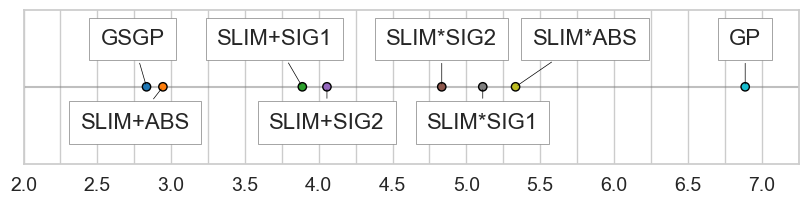

In [237]:
# Random Y-coordinates for aesthetic spacing (ensures points are not all aligned)
y_positions = np.random.uniform(0, 0, len(avg_rank))

plt.figure(figsize=(10, 2))  # Adjust figure size

# Generate colors using a colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(avg_rank)))

# Plot points with different colors
plt.scatter(avg_rank.values, y_positions, c=colors, edgecolors='black', zorder=3)

# Annotate each point
xy_texts = [(-10,30), (-20,-30), (-20,30), (0,-30),(0,30), (0,-30), (50,30), (0,30)]
i = -1
for model, x, y, color in zip(avg_rank.index, avg_rank.values, y_positions, colors):
    i += 1
    print(xy_texts[i])
    plt.annotate(model, (x, y), textcoords="offset points", xytext=xy_texts[i], ha='center', size=16,
                 bbox=dict(boxstyle="square,pad=0.5", fc="white",  ec="gray", lw=0.5),
                 arrowprops=dict(arrowstyle="-",  edgecolor='black', lw=0.5, facecolor='white'),) #color="black", #connectionstyle="arc3,rad=0.1" arrowstyle wedge


plt.grid(axis='y',  alpha=0.0)
plt.ylim(-10, 10)  # Limit y-axis

# Add a **single x-grid line at y = 0**
plt.axhline(0, color='gray', linestyle='-', alpha=0.5) 
# Format x-axis (ranks)
plt.xticks(np.arange(2, 7.5, 0.5))  # Set x-ticks at a step of 0.5
plt.xticks(np.arange(2, 7.5, 0.25), minor=True) 
plt.grid(which='both', axis='x',  linewidth=1)
plt.yticks([])  # Hide y-axis ticks
plt.xticks(fontsize=14)
plt.show()

In [240]:
statistic, p_value = stats.friedmanchisquare(*[rank[col] for col in rank.columns])
print(f"Friedman Test Statistic: {statistic}")
print(f"P-value: {p_value}")

Friedman Test Statistic: 38.51390728476818
P-value: 2.4192569618486164e-06


In [ ]:
def get_log(experiment, dataset_name, config_id):
    print(f"../../../data/results/{experiment}/{dataset_name}/log_config_{config_id}.csv")
    return pd.read_csv(f"../../../data/results/{experiment}/{dataset_name}/log_config_{config_id}.csv")